# Introduction
## Data source
In this assessment, I used the **KDD Cup 1999 Data** dataset. This is a dataset used for a data mining competition. This dataset was used to build a predictive model that can detect normal and abnormal connections. It includes data from simulated intrusions of all types.
## Brief Introduction to the DataSet
Included in this dataset are records of many simulated attacks. In this, each connection is marked as normal or as an attack. The attacks are divided into four main categories: **DOS**, **R2L**, **U2R** and **probing**. These can be obtained from the "flag" variable in the dataset.

# Obtaining the Dataset
## Download Data

In [124]:
#Downloading files by using urllib
import urllib.request
f = urllib.request.urlopen('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names')
data = f.read()
with open('/Users/ziyuanjiang/assessment 1/names1.data','wb') as code:
    code.write(data)
f = urllib.request.urlopen('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz')
data = f.read()
#Decompress the gz zip file before importing the data
with open('/Users/ziyuanjiang/assessment 1/kddcup.data.gz','wb') as code:
    code.write(data)
    
#Import of data using read_scv
import pandas as pd
names = pd.read_csv('/Users/ziyuanjiang/assessment 1/names.data',header=None, sep=':')
data_read = pd.read_csv('/Users/ziyuanjiang/assessment 1/kddcup.data',header=None)
data_read.columns = names[0].values

## Browse the Data
Use **head()** to see the first five lines of a dataframe，

In [126]:
data_read.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,normal
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


Use **value_counts()** to see the number of each type of element in each column，

In [127]:
#View the different categories and their numbers under service in the dataset
data_read.value_counts("service")

service
ecr_i        2811660
private      1100831
http          623091
smtp           96554
other          72653
              ...   
tftp_u             3
http_8001          2
aol                2
harvest            2
http_2784          1
Length: 70, dtype: int64

# Data visualisation
## Bar and pie charts

<BarContainer object of 3 artists>

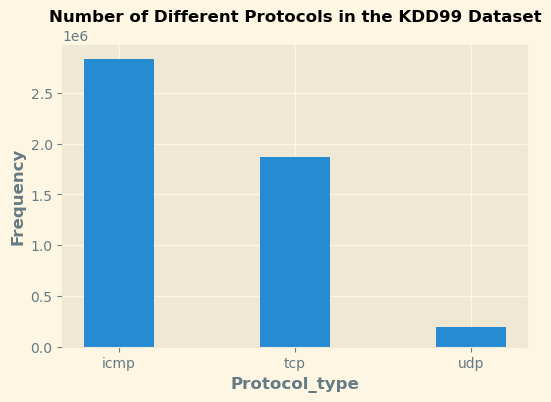

In [139]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt #Using matplotlib to plot figure

x = data_read["protocol_type"].value_counts()
#Use value_counts to count the number of different types of protocols
plt.figure(dpi=100)
labels = x.index
plt.style.use('Solarize_Light2')
plt.title('Number of Different Protocols in the KDD99 Dataset',fontsize=12,y=1.05,weight='bold')
plt.ylabel("Frequency",weight='bold')
plt.xlabel("Protocol_type",weight='bold')
plt.bar(np.arange(len(labels)),
        x,
        width=0.4,
        tick_label=labels,
        )

Using the bar chart it is clear how many protocols correspond to each category. As well as a convenient comparison of the quantities of the different protocols.

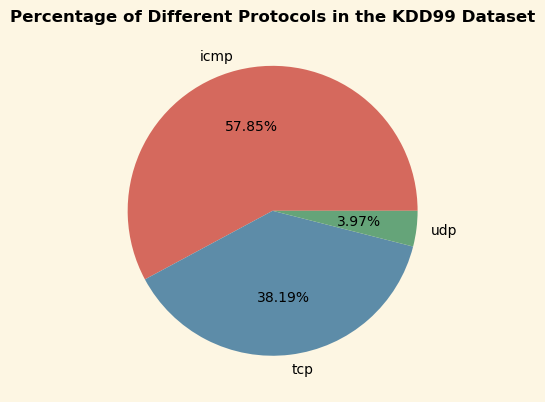

In [143]:
pie_dpi = 100
plt.figure(figsize=(480/pie_dpi,480/pie_dpi),dpi=pie_dpi)
plt.title('Percentage of Different Protocols in the KDD99 Dataset',fontsize=12,weight='bold')
plt.pie(x=x.tolist(),
        labels=x.index,
        colors=["#d5695d", "#5d8ca8", "#65a479"],
        autopct='%.2f%%',
    )
plt.show()

Using the pie chart you can clearly see the percentage of each type of protocol. We can see that the protocol with the highest percentage is icmp, which accounts for more than half of the total, and the protocol with the lowest percentage is udp.

## Scatter Chart

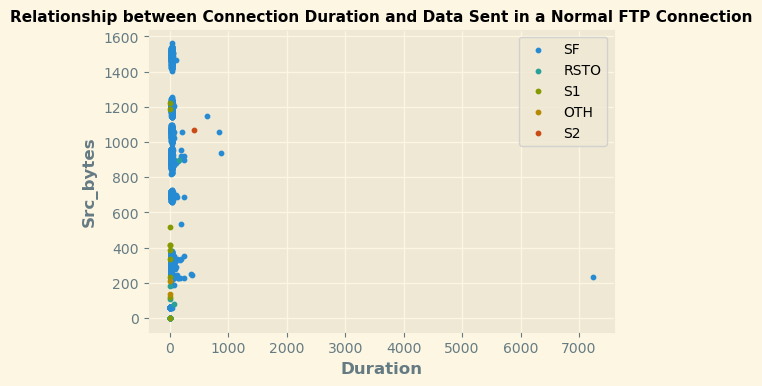

In [151]:
import matplotlib.pyplot as plt 
grouped_single = data_read.groupby("service")
ftp = grouped_single.get_group("ftp")
ftp_normalgroup = ftp.groupby("normal")
ftp_normal = ftp_normalgroup.get_group("normal.")
#Sorting datasets using groupby and get_group

ftp_type = ftp_normal["flag"].value_counts()
ftp_name = ftp_type.index
plt.style.use('Solarize_Light2')
plt.figure(dpi = 100)
for i in range(len(ftp_type)):
    plt.scatter(ftp_normal.loc[ftp_normal['flag'] == ftp_name[i], 'duration'],
            ftp_normal.loc[ftp_normal['flag'] == ftp_name[i], 'src_bytes'],
            label = ftp_name[i],
            s = 10
    )
#Using scatter to draw a figure

plt.xlabel("Duration",weight='bold')
plt.ylabel("Src_bytes",weight='bold')
plt.title("Relationship between Connection Duration and Data Sent in a Normal FTP Connection",weight='bold',fontsize=11)
plt.legend(loc = 'upper right')

plt.show()

Scatter plots are often used to show the linear relationship between the independent and dependent variables. In this data set, no clear linear relationship was found between the amount of data transmitted and the length of the connection. However, it can be seen that most of the connection lengths are below 200.

## Stacked Bar Chart

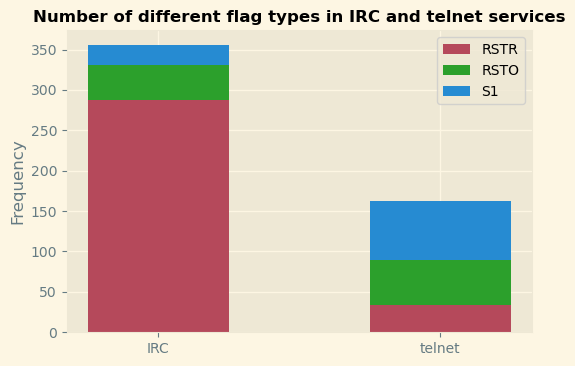

In [158]:
irc = grouped_single.get_group("IRC")
telnet_raw = grouped_single.get_group("telnet")
temp = telnet_raw.groupby("normal")
telnet = temp.get_group("normal.")
irc_count = irc["flag"].value_counts()
telnet_count = telnet["flag"].value_counts()
Labels = ['IRC', 'telnet']
result = pd.concat([irc_count, telnet_count], axis=1)
result.columns = Labels
#Filtering of normal connection data using IRC and telnet services

plt.figure(dpi=100)
bar_width = 0.5

plt.bar(np.arange(len(Labels)),
        [result.loc['RSTR','IRC'],result.loc['RSTR','telnet']],
        color='#B5495B',
        width=bar_width,
        label='RSTR'
       )
plt.bar(np.arange(len(Labels)),
        [result.loc['RSTO','IRC'],result.loc['RSTO','telnet']],
        color='#2ca02c',
        width=bar_width,
        bottom=[result.loc['RSTR','IRC'],result.loc['RSTR','telnet']],
        label='RSTO'
       )
plt.bar(np.arange(len(Labels)),
        [result.loc['S1','IRC'],result.loc['S1','telnet']],
        width=bar_width,
        bottom=[result.loc['RSTO','IRC']+result.loc['RSTR','IRC'],result.loc['RSTO','telnet']+result.loc['RSTR','telnet']],
        label='S1'
       )
plt.ylabel("Frequency")
plt.title("Number of different flag types in IRC and telnet services",weight='bold',fontsize=12)
plt.xticks(np.arange(0,2,step=1),Labels)
plt.legend(loc=1)

By stacking scatter plots, the components of the different data compositions can be derived. It is also possible to see the proportion of each component in the total. In the above graph, it can be seen that the IRC has the largest proportion of "flags" as RSTR.

# References
KDD data: <http://kdd.ics.uci.edu/databases/kddcup99/>
        
Pandas: <https://pandas.pydata.org/>
        
Matplotlib: <https://matplotlib.org/>